 # Lending Club Case Study 

### `Python Code Execution for Case Study in Jupyter Notebook`

1. **Importing Required Libraries into Jupyter Notebook**

In [1]:
import pandas as pd               # Importing Pandas Library
import numpy as np                # Importing Numpy Library
import matplotlib.pyplot as plt   # Importing Matplotlib Library
import seaborn as sns             # Importing Seaborn Library
import warnings 
warnings.filterwarnings('ignore') # Importing Warnings Library


2. **Importing the Required Dataset ('loan.csv') into Jupyter Notebook**

In [2]:
df = pd.read_csv("loan.csv")

3. **Reading the top 5 rows of this dataset**

In [3]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

4. **Finding the shape of this dataset**

In [4]:
df.shape

(39717, 111)

-  Once the data is loaded into the jupyter notebook we can start the data cleaning or data processing process in order to perform the Exploratory Data Analysis (EDA).

### `Performing Data Cleaning for this Dataset`

-  Dealing with missing values

6. **Getting the list of null values in all columns for this dataset**

In [5]:
data_clean = df.isnull().sum().sort_values(ascending=False)
data_clean.head(20)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
open_rv_24m                  39717
open_rv_12m                  39717
il_util                      39717
total_bal_il                 39717
mths_since_rcnt_il           39717
open_il_24m                  39717
dtype: int64

7. **Column shape of the dataset before cleaning**

In [6]:
data_clean.shape

(111,)

8. **Dropping the columns which are having all null values**

In [7]:
df = df.dropna(axis=1,how='all')

9. **Once again checking the columns with null values**

In [8]:
data_clean=df.isnull().sum().sort_values(ascending=False)
data_clean.head(15)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
dtype: int64

10. **Column shape of the dataset after cleaning**

In [9]:
data_clean.shape

(57,)

-  **Dropping the columns which are having more number of null values.**

11.  **Removing the columns i.e,** <br>'next_pymnt_d', <br>'desc'

##### desc might be help if nlp is involved but for EDA, it isn't applicable to use this

In [10]:
df = df.drop(labels=['next_pymnt_d','desc'], axis=1)

12. **Checking the updated shape of the Dataset** (57 - 4 = 53)

In [11]:
df.shape

(39717, 55)

13. **Checking the null values for the remaining columns**

In [12]:
data_clean=df.isnull().sum().sort_values(ascending=False)
data_clean.head(20)

mths_since_last_record        36931
mths_since_last_delinq        25682
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
sub_grade                         0
collection_recovery_fee           0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
dtype: int64

14.  **Checking the value counts for the following columns** <br>'emp_title', <br>'emp_length', <br>'pub_rec_bankruptcies', <br>'last_pymnt_d', <br>'collections_12_mths_ex_med', <br>'chargeoff_within_12_mths', <br>'revol_util', <br>'tax_liens', <br>'title', <br>'last_credit_pull_d'

In [13]:
df['emp_title'].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [14]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [15]:
df['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [16]:
df['last_pymnt_d'].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [17]:
df['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [18]:
df['collections_12_mths_ex_med'].value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [19]:
df['revol_util'].value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [20]:
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [21]:
df['title'].value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [22]:
df['last_credit_pull_d'].value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

15. **Getting the list of rows from the following columns which are having not null values** <br>'emp_title', <br>'emp_length', <br>'pub_rec_bankruptcies', <br>'last_pymnt_d', <br>'collections_12_mths_ex_med', <br>'chargeoff_within_12_mths', <br>'revol_util', <br>'tax_liens', <br>'title', <br>'last_credit_pull_d'

In [23]:
df = df[df['emp_title'].notna()] 

In [24]:
df = df[df['emp_length'].notna()] 

In [25]:
df = df[df['pub_rec_bankruptcies'].notna()] 

In [26]:
df = df[df['last_pymnt_d'].notna()] 

In [27]:
df = df[df['chargeoff_within_12_mths'].notna()] 

In [28]:
df = df[df['collections_12_mths_ex_med'].notna()] 

In [29]:
df = df[df['revol_util'].notna()] 

In [30]:
df = df[df['tax_liens'].notna()] 

In [31]:
df = df[df['title'].notna()] 

In [32]:
df = df[df['last_credit_pull_d'].notna()] 

16. **Updated shape of the Dataset**


In [33]:
df.shape 

(36431, 55)

17. **Checking any null value columns are present in the dataset**

In [34]:
data_clean=df.isnull().sum().sort_values(ascending=False)
data_clean.head(20)

mths_since_last_record        34543
mths_since_last_delinq        23934
total_rec_late_fee                0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
recoveries                        0
collection_recovery_fee           0
last_pymnt_d                      0
last_pymnt_amnt                   0
last_credit_pull_d                0
collections_12_mths_ex_med        0
dtype: int64

-  **Once we completed the Data Cleaning step, Now it's time for to perform Exploratory Data Analysis**

## Exploratory Data Analysis

18. **Listing out the Final columns in the dataset after processing**

In [35]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

-   Columns that are relevant regarding deliquency
<br> 1. loan_status
<br> 2. delinq_2yrs
<br> 3. mths_since_last_delinq
<br> 4. delinq_amnt (all zeros)
<br> 5. acc_now_delinq (all zeros)
<br> 6. mths_since_recent_bc_dlq (NANs)
<br> 7. mths_since_recent_revol_delinq (NANs)
<br> 8. verification_status

20. **Checking the value counts for 'loan_status' column**

In [36]:
df['loan_status'].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

21. **Assigning the charged off customers to the "default" variable**

In [37]:
default = df[df['loan_status']=='Charged Off']

22. **Checking the top 5 rows of the "default" variable**

In [38]:
default.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
1   1077430    1314167       2500         2500           2500.0   60 months   
9   1071570    1306721       5375         5375           5350.0   60 months   
12  1064687    1298717       9000         9000           9000.0   36 months   
14  1069057    1303503      10000        10000          10000.0   36 months   
21  1039153    1269083      21000        21000          21000.0   36 months   

   int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
1    15.27%        59.83     C        C4  ...          119.66   
9    12.69%       121.45     B        B5  ...          121.45   
12   13.49%       305.38     C        C1  ...          305.38   
14   10.65%       325.74     B        B2  ...          325.74   
21   12.42%       701.73     B        B4  ...          701.73   

   last_credit_pull_d collections_12_mths_ex_med  policy_code  \
1              Sep-13                        0.0            1   
9              Mar-13                        0.0            1   
12             Nov-12                        0.0            1   
14             Mar-14                        0.0            1   
21             May-16                        0.0            1   

   application_type acc_now_delinq chargeoff_within_12_mths delinq_amnt  \
1        INDIVIDUAL              0                      0.0           0   
9        INDIVIDUAL              0                      0.0           0   
12       INDIVIDUAL              0                      0.0           0   
14       INDIVIDUAL              0                      0.0           0   
21       INDIVIDUAL              0                      0.0           0   

   pub_rec_bankruptcies tax_liens  
1                   0.0       0.0  
9                   0.0       0.0  
12                  0.0       0.0  
14                  0.0       0.0  
21                  0.0       0.0  

[5 rows x 55 columns]

In [39]:
default.shape

(4942, 55)

### Univariate Analysis

### `Defaulter's Loan profile`

23. **Plotting the Histogram for the 'loan_amnt' column**

(array([ 736., 1010.,  879.,  613.,  538.,  461.,  196.,  273.,   85.,
         151.]),
 array([ 1000.,  4400.,  7800., 11200., 14600., 18000., 21400., 24800.,
        28200., 31600., 35000.]),
 <BarContainer object of 10 artists>)

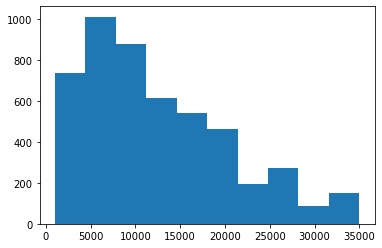

In [40]:
plt.hist(default['loan_amnt'])

24. **Plotting the horizantal bar plot (barh) for the 'term' column**

<AxesSubplot:>

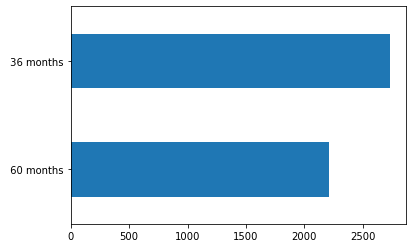

In [41]:
default['term'].value_counts().sort_values(ascending=True).plot.barh()

25. **Plotting the Histogram for the 'installment' column**

(array([ 948., 1351., 1152.,  673.,  380.,  194.,  176.,   48.,   12.,
           8.]),
 array([  22.79,  151.03,  279.27,  407.51,  535.75,  663.99,  792.23,
         920.47, 1048.71, 1176.95, 1305.19]),
 <BarContainer object of 10 artists>)

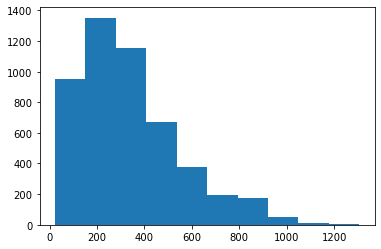

In [42]:
plt.hist(default['installment'])

### `Borrower's profile`

26. **Plotting the horizantal bar plot (barh) for the 'home_ownership' column**

<AxesSubplot:>

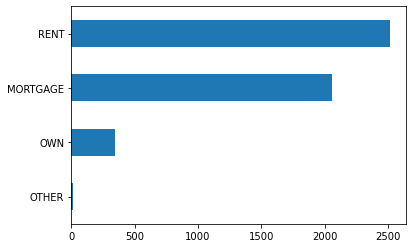

In [43]:
default['home_ownership'].value_counts().sort_values(ascending=True).plot.barh()

27. **Plotting a Boxplot for the 'annual_inc' column**

<AxesSubplot:>

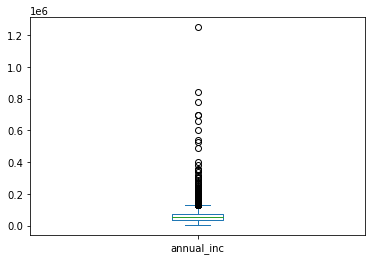

In [44]:
default['annual_inc'].plot.box()

28. **Plotting a horizantal bar graph for the 'purpose' column**

<AxesSubplot:>

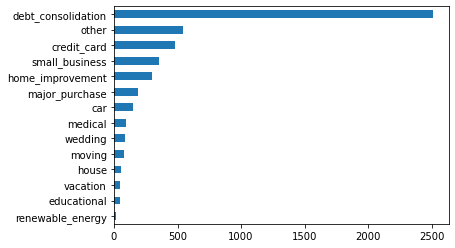

In [45]:
default['purpose'].value_counts().sort_values(ascending=True).plot.barh()

-  Borrowers' amount of credit lines

29. **Plotting a histogram for 'total_acc' column**

(array([ 516., 1182., 1170.,  912.,  531.,  368.,  173.,   47.,   41.,
           2.]),
 array([ 2. ,  8.8, 15.6, 22.4, 29.2, 36. , 42.8, 49.6, 56.4, 63.2, 70. ]),
 <BarContainer object of 10 artists>)

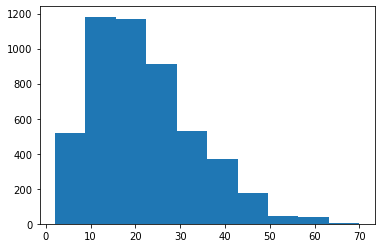

In [46]:
plt.hist(default['total_acc'])

-  loan balance = loan_amnt - total_pymnt

30. **Checking the value_counts for the 'last_pymnt_amnt' column**

In [47]:
default['last_pymnt_amnt'].value_counts()

200.00    15
100.00    14
50.00     12
400.00    11
150.00    10
          ..
244.09     1
266.34     1
348.35     1
320.25     1
133.55     1
Name: last_pymnt_amnt, Length: 4128, dtype: int64

31. **Checking the value_counts for the 'application_type' column**

In [48]:
default['application_type'].value_counts()

INDIVIDUAL    4942
Name: application_type, dtype: int64

32. **Checking the value_counts for the 'pub_rec_bankruptcies' column**

In [49]:
default['pub_rec_bankruptcies'].value_counts()

0.0    4630
1.0     310
2.0       2
Name: pub_rec_bankruptcies, dtype: int64

33. **Plotting an Histogram for the 'mths_since_last_delinq' column**

(array([211., 319., 295., 249., 272., 174., 177., 115.,   0.,   2.]),
 array([  0. ,  10.7,  21.4,  32.1,  42.8,  53.5,  64.2,  74.9,  85.6,
         96.3, 107. ]),
 <BarContainer object of 10 artists>)

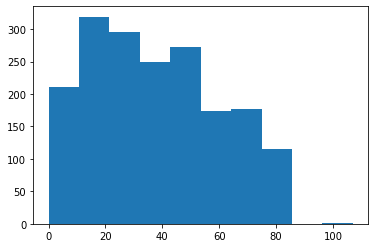

In [50]:
plt.hist(default['mths_since_last_delinq'])

34. **Checking the value counts for the 'mths_since_last_delinq' column in horizantal bar graph**

<AxesSubplot:>

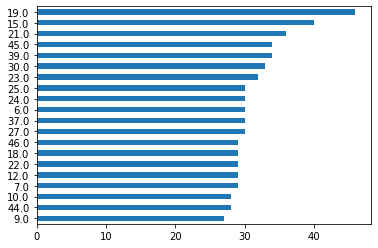

In [51]:
default['mths_since_last_delinq'].value_counts().head(20).sort_values(ascending=True).plot.barh()

### Bivariate Analysis

35. Obtaining the correlation for default

In [52]:
default.corr()

id  member_id  loan_amnt  funded_amnt  \
id                          1.000000   0.993824   0.168543     0.184035   
member_id                   0.993824   1.000000   0.166137     0.181478   
loan_amnt                   0.168543   0.166137   1.000000     0.978554   
funded_amnt                 0.184035   0.181478   0.978554     1.000000   
funded_amnt_inv             0.280146   0.288560   0.928518     0.950845   
installment                 0.106160   0.097244   0.924260     0.952807   
annual_inc                 -0.006569  -0.007141   0.343746     0.339359   
dti                         0.098838   0.098451   0.070761     0.068869   
delinq_2yrs                 0.020519   0.022498  -0.026951    -0.024650   
inq_last_6mths             -0.049497  -0.052035   0.005041     0.004515   
mths_since_last_delinq     -0.011981  -0.013037   0.018035     0.022489   
mths_since_last_record      0.155466   0.162874   0.133757     0.132102   
open_acc                    0.022937   0.016298   0.170894     0.168135   
pub_rec                    -0.055689  -0.054503  -0.040988    -0.046707   
revol_bal                  -0.023120  -0.031382   0.319091     0.302017   
total_acc                   0.021718   0.019417   0.281186     0.273132   
out_prncp                        NaN        NaN        NaN          NaN   
out_prncp_inv                    NaN        NaN        NaN          NaN   
total_pymnt                 0.139461   0.139630   0.681772     0.699395   
total_pymnt_inv             0.195750   0.202117   0.653700     0.672329   
total_rec_prncp             0.066985   0.066580   0.549289     0.567353   
total_rec_int               0.207333   0.209937   0.701971     0.715861   
total_rec_late_fee         -0.088437  -0.090274   0.089093     0.095908   
recoveries                  0.075259   0.072995   0.315128     0.320647   
collection_recovery_fee    -0.042766  -0.045964   0.164319     0.171069   
last_pymnt_amnt             0.036531   0.033128   0.335588     0.340576   
collections_12_mths_ex_med       NaN        NaN        NaN          NaN   
policy_code                      NaN        NaN        NaN          NaN   
acc_now_delinq                   NaN        NaN        NaN          NaN   
chargeoff_within_12_mths         NaN        NaN        NaN          NaN   
delinq_amnt                      NaN        NaN        NaN          NaN   
pub_rec_bankruptcies       -0.030916  -0.028154  -0.017199    -0.024071   
tax_liens                        NaN        NaN        NaN          NaN   

                            funded_amnt_inv  installment  annual_inc  \
id                                 0.280146     0.106160   -0.006569   
member_id                          0.288560     0.097244   -0.007141   
loan_amnt                          0.928518     0.924260    0.343746   
funded_amnt                        0.950845     0.952807    0.339359   
funded_amnt_inv                    1.000000     0.889098    0.317774   
installment                        0.889098     1.000000    0.350966   
annual_inc                         0.317774     0.350966    1.000000   
dti                                0.073032     0.051254   -0.081408   
delinq_2yrs                       -0.023086    -0.011601    0.032709   
inq_last_6mths                    -0.007746     0.014975    0.034686   
mths_since_last_delinq             0.024666     0.012161   -0.033614   
mths_since_last_record             0.128928     0.096718    0.088997   
open_acc                           0.147467     0.167265    0.207119   
pub_rec                           -0.052800    -0.035780    0.000265   
revol_bal                          0.261266     0.305657    0.364480   
total_acc                          0.252049     0.252709    0.287081   
out_prncp                               NaN          NaN         NaN   
out_prncp_inv                           NaN          NaN         NaN   
total_pymnt                        0.699830     0.670691    0.277281   
total_pymnt_inv                    0.720870

36. **Plotting a scatter plot for 'loan_amnt' and 'annual_inc' using bivariate analysis**

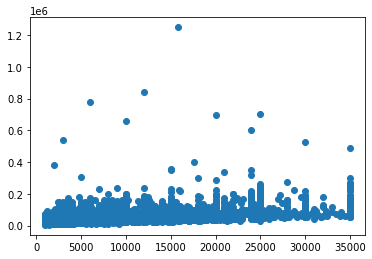

In [54]:
plt.scatter(default['loan_amnt'], default['annual_inc'])

- This proves that annual income is not a driving factor for them to increase their loans

37. **Plotting a scatter plot for 'mths_since_last_delinq' and 'annual_inc' using bivariate analysis**

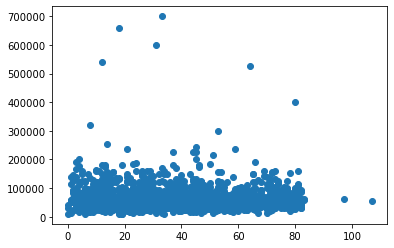

In [55]:
plt.scatter(default['mths_since_last_delinq'], default['annual_inc'])

38. **Plotting a scatter plot for 'mths_since_last_delinq' and 'loan_amnt' using bivariate analysis**

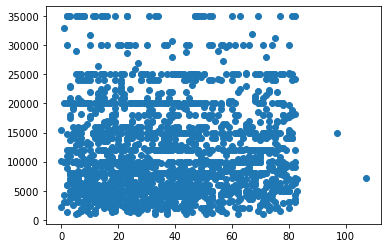

In [58]:
plt.scatter(default['mths_since_last_delinq'], default['loan_amnt'])